# Homework 1 - Programming section

## Question 1

Using `sklearn`, apply a stratified 70-30 training-testing split with a fixed seed
(`random_state=1`), and assess in a single plot the training and testing accuracies of a decision tree
with no depth limits (and remaining default behavior) for a varying number of selected features
in `{5,10,40,100,250,700}`.  
Feature selection should be performed before decision tree learning
considering the discriminative power of the input variables according to mutual information
criterion (`mutual_info_classif`).

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.io.arff import loadarff
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import mutual_info_classif
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

FEATURE_AMOUNT = [5, 10, 40, 100, 250, 700]
SEED = 1

### Loading data

In [13]:
df = loadarff('data/pd_speech.arff')
df = pd.DataFrame(df[0])
df['class'] = df['class'].str.decode('utf-8')
df.head()

,PPE,DFA,RPDE,numPulses,numPeriodsPulses,meanPeriodPulses,stdDevPeriodPulses,locPctJitter,locAbsJitter,rapJitter,...,tqwt_kurtosisValue_dec_28,tqwt_kurtosisValue_dec_29,tqwt_kurtosisValue_dec_30,tqwt_kurtosisValue_dec_31,tqwt_kurtosisValue_dec_32,tqwt_kurtosisValue_dec_33,tqwt_kurtosisValue_dec_34,tqwt_kurtosisValue_dec_35,tqwt_kurtosisValue_dec_36,class
0,0.85247,0.71826,0.57227,240.0,239.0,0.008064,0.000087,0.00218,0.000018,0.00067,...,1.5620,2.6445,3.8686,4.2105,5.1221,4.4625,2.6202,3.0004,18.9405,1
1,0.76686,0.69481,0.53966,234.0,233.0,0.008258,0.000073,0.00195,0.000016,0.00052,...,1.5589,3.6107,23.5155,14.1962,11.0261,9.5082,6.5245,6.3431,45.1780,1
2,0.85083,0.67604,0.58982,232.0,231.0,0.008340,0.000060,0.00176,0.000015,0.00057,...,1.5643,2.3308,9.4959,10.7458,11.0177,4.8066,2.9199,3.1495,4.7666,1
3,0.41121,0.79672,0.59257,178.0,177.0,0.010858,0.000183,0.00419,0.000046,0.00149,...,3.7805,3.5664,5.2558,14.0403,4.2235,4.6857,4.8460,6.2650,4.0603,1
4,0.32790,0.79782,0.53028,236.0,235.0,0.008162,0.002669,0.00535,0.000044,0.00166,...,6.1727,5.8416,6.0805,5.7621,7.7817,11.6891,8.2103,5.0559,6.1164,1


The first step should be splitting the dataset into training and testing sets (70-30) with a fixed seed (`random_state=1`).

In [14]:
train, test = train_test_split(df, test_size=0.3, random_state=SEED, stratify=df['class'])
X = train.drop('class', axis=1)
y = train['class']

Afterward, we should try to check the discriminative power of each feature considering the `mutual_info_classif` criterion.
If we can only use a subset of features, we should select the most discriminative ones, (i.e, if we can use 5 features, we should select the 5 most discriminative ones, and so on).

In [15]:
mimportance = mutual_info_classif(X, y)
SORTED_FEATURE_INDICES = np.argsort(mimportance)[::-1]

Now, time to finally assess (in a single plot) both the training and testing accuracies of a decision tree with no depth limits (and remaining default behavior) for a varying number of selected features.

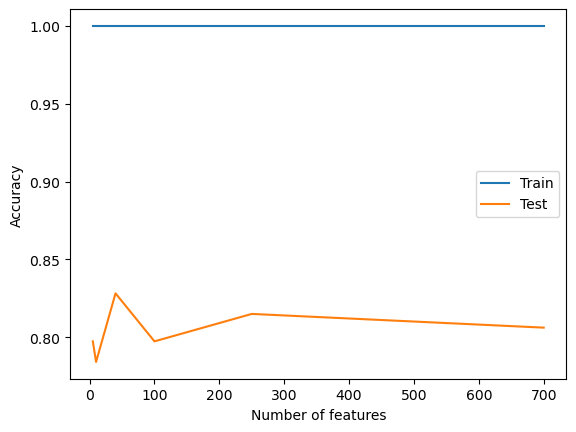

In [16]:
def train_and_test(X_train, X_test, y_train, y_test):
    clf = DecisionTreeClassifier()
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    return accuracy_score(y_test, y_pred)

train_accuracies = []
test_accuracies = []

for n in FEATURE_AMOUNT:
    chosen_features = X.columns[SORTED_FEATURE_INDICES[:n]]
    X_train = train[chosen_features]
    X_test = test[chosen_features]
    train_accuracies.append(train_and_test(X_train, X_train, y, y))
    test_accuracies.append(train_and_test(X_train, X_test, y, test['class']))

plt.plot(FEATURE_AMOUNT, train_accuracies, label='Train')
plt.plot(FEATURE_AMOUNT, test_accuracies, label='Test')
plt.xlabel('Number of features')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

## Question 2

Why is training accuracy persistently 1? Critically analyze the gathered results. 

Since the decision tree has no depth-limit associated, the worst-case scenario sees the tree
holding exactly one leaf per training sample - leading to there always being a "correct path" in the tree for a given observation - and thus the training accuracy is always 1, for any train-test split of the dataset.

The testing accuracy isn't necessarily 1, of course, just like it can be seen in the plot shown above: in the vast majority of cases, the testing set will hold samples which differ from all seen in the training set, effectively evicting the "guarantee" of a correct guess from the decision tree. It can, of course, still take a correct guess (with that being our goal), but it's not guaranteed.